# Section 1 - Model Selection


In [ ]:
# all neceessary imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


This data below is coming from a cleaned dataset, located on https://www.kaggle.com/datasets/priscillapun/crime-in-atlanta-2017

The previous milestone was focused on cleaning the previous data, and with this cleaned set, we can prep it for the models to come. 

In [ ]:
df = pd.read_csv("df_clean_milestone1.csv")  # milestone 1 cleaned

df.head()


,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,location,MinOfucr,...,loc_type,UC2 Literal,neighborhood,npu,x,y,hour,is_weekend,is_night,npu_frequency
0,8924155,173650072,12/31/2017,2017-12-30,23:15:00,12/31/2017,00:30:00,510,43 JESSE HILL JR DR NE,640,...,13.0,LARCENY-FROM VEHICLE,Downtown,M,-84.38013,33.75582,23,1,0,3077
1,8924156,173650102,12/31/2017,2017-12-18,13:00:00,12/30/2017,22:00:00,501,1169 ATLANTIC DR NW,640,...,13.0,LARCENY-FROM VEHICLE,Home Park,E,-84.39745,33.78674,13,0,0,2742
2,8924157,173650144,12/31/2017,2017-12-30,22:01:00,12/31/2017,01:00:00,303,633 PRYOR ST SW,640,...,18.0,LARCENY-FROM VEHICLE,Mechanicsville,V,-84.39486,33.73760,22,1,0,1279
3,8924158,173650149,12/31/2017,2017-12-30,20:00:00,12/31/2017,01:06:00,507,333 NELSON ST SW,640,...,18.0,LARCENY-FROM VEHICLE,Castleberry Hill,M,-84.39887,33.75156,20,1,1,3077
4,8924159,173650159,12/31/2017,2017-12-31,00:41:00,12/31/2017,00:48:00,409,2348 CASCADE RD SW,640,...,18.0,LARCENY-FROM VEHICLE,Adams Park,R,-84.46522,33.72146,0,1,0,1051


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26489 entries, 0 to 26488
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MI_PRINX          26489 non-null  int64  
 1   offense_id        26489 non-null  int64  
 2   rpt_date          26489 non-null  object 
 3   occur_date        26489 non-null  object 
 4   occur_time        26489 non-null  object 
 5   poss_date         26489 non-null  object 
 6   poss_time         26489 non-null  object 
 7   beat              26489 non-null  int64  
 8   location          26489 non-null  object 
 9   MinOfucr          26489 non-null  int64  
 10  MinOfibr_code     26489 non-null  object 
 11  MaxOfnum_victims  26489 non-null  object 
 12  Shift             26489 non-null  object 
 13  Avg Day           26489 non-null  object 
 14  loc_type          26489 non-null  object 
 15  UC2 Literal       26489 non-null  object 
 16  neighborhood      26489 non-null  object

Ideally from this dataset would be a classification set, predicting what crime could take place given certain conditions. These conditions can include occur_time, npu, neighborhood, etc.

UC2 Literal would be the referred column when selecting our classification model, from several potential cases of crimes including larceny, theft, etc.

Before training, I noticed a glaring issue of potential data leakage that could yield severally very high accurate models due to very correlated variables with UC2-Literal. With more columns needed to be dropped due to the fact that there are columns included within the csv that address some concerns


In [ ]:
# all of these were selected due to various reasons
# "MI_PRINX", "offense_id" were both highly individualized, making them moot to include within a
# classifcation model of predicting what certain crime could take place based on those conditions

# occur_date is still a good strong indicator of when the crime occured, that would be kept.
# with occur_date kept, we already have an hour indicator of when the crime took place from
# milestone 1, as the column of both occur_time and poss_time was finiky to handle as a csv
# both outside and insice the note book, occur_time and poss_time will be dropped

# poss_date refers to when the crime was reported, most of these crimes were on the same day,
# and with that being said, rpt_date is often the same day as poss_date as well, leaving
# three columns that can potentially be filled on the same day

# location is highly specialized within the exact address the crime occured, this is already addressed
# through the npu and neighborhood columns of getting a good idea of this.

# MinOfucr AND MinOfibr_code is *highly correlated with UC2 Literal, showing that it ultimately be dropped
# due to how big of a potential data leak that can be, a column showing the type of crime,
# with it meaning the crime couldnt be fairly predicted.

# the x and y columns refering to the coordinates will also be dropped due to how both of these
# are a bit redundant when the npu and neighborhood are great indicators of where the crime occured
# and x, y don't feel as strongly tied

cols_to_drop = [
    "MI_PRINX", "offense_id", "rpt_date", "occur_date", "occur_time",
    "poss_date", "poss_time", "beat", "location",
    "MinOfucr", "MinOfibr_code", "x", "y"
]

df_model = df.drop(columns=cols_to_drop).copy()

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26489 entries, 0 to 26488
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MaxOfnum_victims  26489 non-null  object
 1   Shift             26489 non-null  object
 2   Avg Day           26489 non-null  object
 3   loc_type          26489 non-null  object
 4   UC2 Literal       26489 non-null  object
 5   neighborhood      26489 non-null  object
 6   npu               26489 non-null  object
 7   hour              26489 non-null  int64 
 8   is_weekend        26489 non-null  int64 
 9   is_night          26489 non-null  int64 
 10  npu_frequency     26489 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.2+ MB



Of the classification algorithms that could be potentially tested the top three that came to mind.

1. Logistical Regression - Model learned from this class. It's a statistical model that is focused on the probablity of a binary outcome based on a set of independ variables. It can be strong for a high dimensional dataset such as the one I have even with several columns taken out. This is more true with the introduction of onehot encoded variables too.

2. Random Forest - A familiar model that I've used before in the past. It can capture nonlinear relationships between features and interactions among features. It's a robust algorithm, as you can anticipate variance in the randomness of it. It does perform well on classification tasks with its robustness.

3. KNN - K-Nearest Neighbors is another algorithm I learned in this class. It's simple and comprehesible in the main understanding of the algorithm. As it's based on the principle of similar happenings hapen within proximity with one another, it can be effective if a pattern like such is present within the dataset. With encoding though, the increased dimensionality can weaken the distance methods of the algorithm. It will still be tested, but it might yield lower than wanted results.

# Section 2 - Model Training

Now that we are on the model training phase, we can go through an iterate over the Logistical Regression, Random Forest, and the KNN algorithms over the dataset. With the goal of predicting the exact crime, UC2 Literal column.

In [ ]:
from sklearn.model_selection import train_test_split # for the main training
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# all necessary imports for section
# all our potential models below
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df.columns
df.dtypes
df["UC2 Literal"].value_counts()


,count
UC2 Literal,
LARCENY-FROM VEHICLE,9797
LARCENY-NON VEHICLE,6400
AUTO THEFT,3190
BURGLARY-RESIDENCE,2627
AGG ASSAULT,2020
ROBBERY-PEDESTRIAN,1123
BURGLARY-NONRES,755
RAPE,224
ROBBERY-COMMERCIAL,157


In [ ]:
X = df_model.drop(columns=["UC2 Literal"])
y = df_model["UC2 Literal"]

In [ ]:
df_model.columns


Index(['MaxOfnum_victims', 'Shift', 'Avg Day', 'loc_type', 'UC2 Literal',
       'neighborhood', 'npu', 'hour', 'is_weekend', 'is_night',
       'npu_frequency'],
      dtype='object')

In [ ]:
X.columns


Index(['MaxOfnum_victims', 'Shift', 'Avg Day', 'loc_type', 'neighborhood',
       'npu', 'hour', 'is_weekend', 'is_night', 'npu_frequency'],
      dtype='object')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26489 entries, 0 to 26488
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MaxOfnum_victims  26489 non-null  object
 1   Shift             26489 non-null  object
 2   Avg Day           26489 non-null  object
 3   loc_type          26489 non-null  object
 4   neighborhood      26489 non-null  object
 5   npu               26489 non-null  object
 6   hour              26489 non-null  int64 
 7   is_weekend        26489 non-null  int64 
 8   is_night          26489 non-null  int64 
 9   npu_frequency     26489 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.0+ MB


In [ ]:
# based on everything that is numbered
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()


In [ ]:
# training 80 : 20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

80 / 20 split used as it's standard upon prior research of how it's a standard balance for most ML problems. The larger training percentage as opposed to say 70% is due to the various categories these sorts of crimes can entail, and the relationships between features. This will give a realistic performance in an effort to reduce any sort of overfitting.

In [ ]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [ ]:
models = {
    "Logistic Regression": Pipeline([
        ("preprocess", preprocessor),
        ("model", LogisticRegression(max_iter=1000))
    ]),

    "Random Forest": Pipeline([
        ("preprocess", preprocessor),
        ("model", RandomForestClassifier(n_estimators=200, random_state=42))
    ]),

    "KNN": Pipeline([
        ("preprocess", preprocessor),
        ("model", KNeighborsClassifier(n_neighbors=7))
    ])
}

Through this dictionary of models ( as its in a dictionary to help with next cells) , here is the rationale behind the choices. Logistic Regression is ensured to include the one-hot encoding that the model favors heavily in its process. 1000 iterations is quite enough to converge through the multiple relationships. With 200 trees in the Random Forest model,it takes a considerable amount of time and resources of training, with the random state of 42 being somewhat reproducible through multiple runs. KNN has scaling and with a value of 7 it has a great balance of stablity without too much 'noise' when training

In [ ]:
for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train, y_train)


Training Logistic Regression
Training Random Forest
Training KNN


After iterating through the dictionary of models, we can see all of them have been trained with the sci kit learn import, so we can now move forward into the Model Evaluation.

# Section 3 - Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results_lst = []

# evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)

    # from rubric, evaluate classification model based off
    # accuracy, precision, recall and f1
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

    results_lst.append([name, accuracy, precision, recall, f1])

results_lst



[['Logistic Regression',
  0.5302000755001888,
  0.47460073181044454,
  0.5302000755001888,
  0.48313924582222084],
 ['Random Forest',
  0.4881087202718007,
  0.452644073212567,
  0.4881087202718007,
  0.4657320310303118],
 ['KNN',
  0.45941864854662134,
  0.4371523074179113,
  0.45941864854662134,
  0.4391720631234889]]

In [ ]:
res_df = pd.DataFrame(results_lst,
                      columns=["Model", "Accuracy", "Precision", "Recall", "F1-score (weighted)"])

res_df.head()


,Model,Accuracy,Precision,Recall,F1-score (weighted)
0,Logistic Regression,0.530200,0.474601,0.530200,0.483139
1,Random Forest,0.488109,0.452644,0.488109,0.465732
2,KNN,0.459419,0.437152,0.459419,0.439172


Now based off the data frame of the results above, we can see that Logisitic Regression has the highest results amongst the three models, from every metric. However we can still go through the details of the three models, see what crimes it accurately predicted compared to the others. We can also look at a confusion matrix graph to gain further insight.

In [ ]:
from sklearn.metrics import classification_report

# iterate through each of the 11 potential crimes of UC2 Literal
for name, model in models.items():
    print(f"{name} Stats")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=0))


Logistic Regression Stats
                      precision    recall  f1-score   support

         AGG ASSAULT       0.25      0.11      0.15       404
          AUTO THEFT       0.29      0.08      0.13       638
     BURGLARY-NONRES       0.41      0.25      0.31       151
  BURGLARY-RESIDENCE       0.36      0.56      0.43       525
            HOMICIDE       1.00      1.00      1.00        13
LARCENY-FROM VEHICLE       0.59      0.78      0.67      1960
 LARCENY-NON VEHICLE       0.60      0.65      0.62      1280
                RAPE       0.00      0.00      0.00        45
  ROBBERY-COMMERCIAL       0.50      0.13      0.21        31
  ROBBERY-PEDESTRIAN       0.12      0.01      0.02       225
   ROBBERY-RESIDENCE       0.00      0.00      0.00        26

            accuracy                           0.53      5298
           macro avg       0.37      0.32      0.32      5298
        weighted avg       0.47      0.53      0.48      5298

Random Forest Stats
                     

Overall, Logistic Regression became the most reliable model for this dataset (with it's 53% accuracy); it treated the big categories of crime the best and kept a steady balance between precision, recall, and F1-that is why it finished with the highest accuracy and weighted F1 out of the three. Random Forest wasn't all that far behind, though it struggled more with the heavy class imbalance at times and over-focused on the common crime types. KNN had it toughest since one-hot encoded features make it very hard for distance-based models to find real structure, so its performance dropped on almost every minority class. All three struggled with the rare types of crimes, but Logistic Regression gave the most consistent overall results, so it ends up being the strongest pick for this milestone.

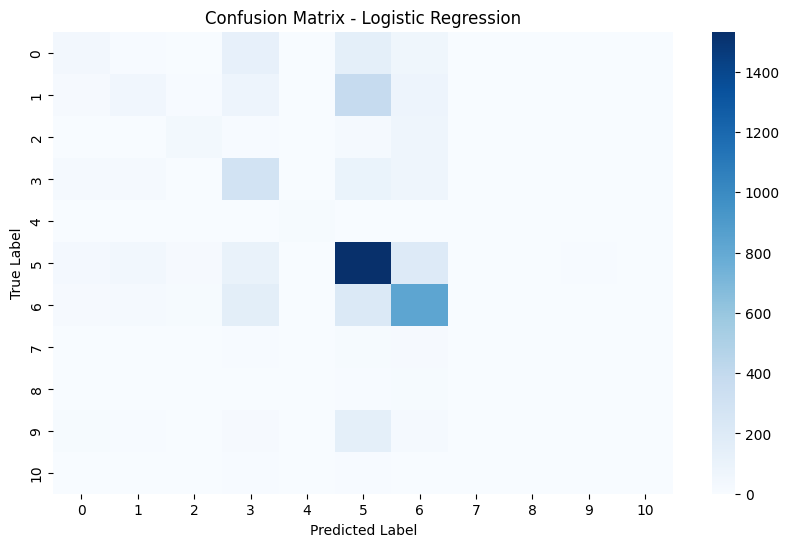


Confusion Matrix Values for Logistic Regression:


,0,1,2,3,4,5,6,7,8,9,10
0,44,11,5,127,0,147,65,0,0,5,0
1,23,54,8,83,0,385,82,0,0,3,0
2,2,2,37,11,0,24,74,0,0,1,0
3,28,29,2,292,0,98,76,0,0,0,0
4,0,0,0,0,13,0,0,0,0,0,0
5,34,50,19,111,0,1533,202,0,2,9,0
6,22,28,16,161,0,221,829,0,1,2,0
7,2,2,0,6,0,17,18,0,0,0,0
8,0,2,1,0,0,11,12,0,4,1,0
9,16,8,3,20,0,147,27,0,1,3,0


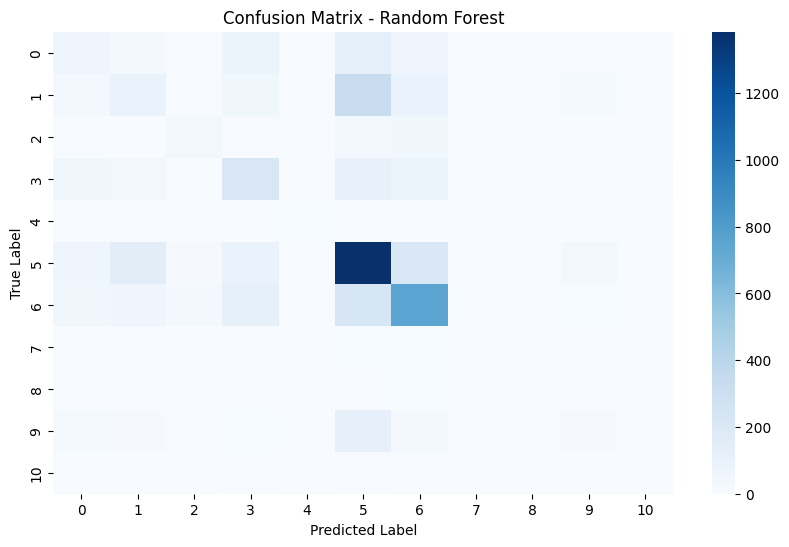


Confusion Matrix Values for Random Forest:


,0,1,2,3,4,5,6,7,8,9,10
0,68,30,9,79,0,130,72,5,0,10,1
1,32,87,7,59,0,336,94,1,0,22,0
2,5,3,39,10,0,33,58,0,0,2,1
3,56,47,5,214,0,104,86,3,0,3,7
4,0,0,0,0,13,0,0,0,0,0,0
5,69,149,18,91,0,1384,202,2,3,41,1
6,57,67,30,121,0,225,760,4,2,14,0
7,4,6,0,6,0,16,11,2,0,0,0
8,2,1,2,0,0,10,15,0,1,0,0
9,24,18,3,13,0,116,31,2,0,18,0


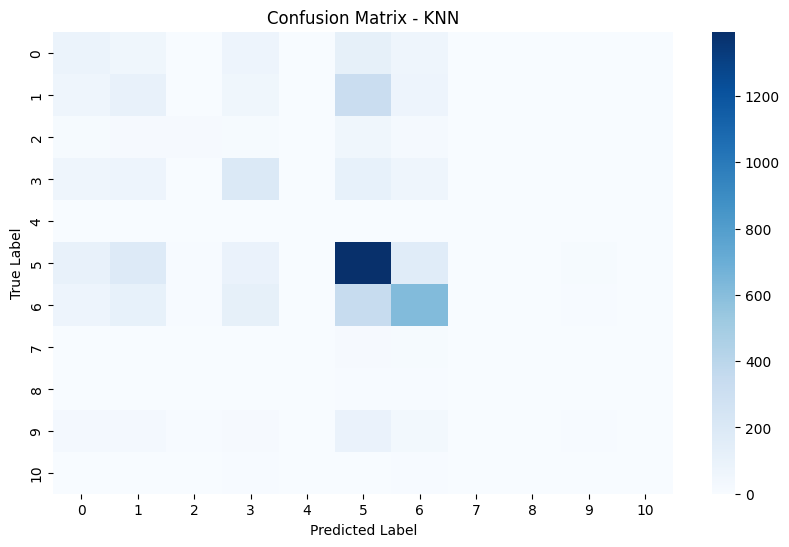


Confusion Matrix Values for KNN:


,0,1,2,3,4,5,6,7,8,9,10
0,82,57,4,73,0,122,64,0,0,2,0
1,65,108,4,57,0,325,74,0,0,5,0
2,11,21,20,14,0,57,26,0,0,2,0
3,65,76,3,200,0,111,68,1,0,1,0
4,1,1,1,2,0,5,3,0,0,0,0
5,108,181,9,93,0,1394,161,2,0,12,0
6,75,110,7,122,0,340,620,0,0,6,0
7,4,3,2,5,0,19,12,0,0,0,0
8,5,5,2,3,0,10,6,0,0,0,0
9,32,28,6,18,0,97,34,0,0,10,0


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

for name, model in models.items(): # iterate thru 3 models

    # confusion matrices
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10,6))
    sns.heatmap(cm, cmap="Blues", cbar=True)

    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


    # see graph in text form below
    print(f"\nConfusion Matrix Values for {name}:")
    cm_df = pd.DataFrame(cm)
    display(cm_df)


As you can see from above, the models perform best on the two most common crimes that happen in the city, 5 - 'LARCENY-FROM VEHICLE' and 6 - 'LARCENY-NON VEHICLE'. As these are the most common crimes in this dataset, the models are heavily reliant on them in terms of overall accuracy. These two sections are strongest amongst the three models, as it might be hard to detect the small crimes from the overwhelmingly large ones.



# Section 4 and 5 - Code Quality Review and Report Preparation

Hope you are happy to find the code is detailed with no errors; with everything being well stated.

From the three models tested of Logistic Regression, Random Forest, and KNN; Logistic Regression was the most reliable. It isn't perfect by any means, but compared to the other two the metrics and consistentcy showed how it handled the data better.